## Import data from DB.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dfOrg = pd.read_csv('hope_dataset_cleaned.csv')  

print(dfOrg.shape[0])

1243


In [3]:
dfOrg.head(10)

,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,pedido.data.attributes.gender,articulo,respuesta.articlesRevisedYear,respuesta.articlesRevisedMonth,respuesta.pubmed_keys,utilidad
0,75.0,FISTULA PERITONEAL,male,27395425,2018,1,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",1.0
1,75.0,FISTULA PERITONEAL,male,28560554,2018,4,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
2,75.0,FISTULA PERITONEAL,male,28641726,2017,12,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
3,75.0,FISTULA PERITONEAL,male,26245344,2016,12,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
4,75.0,FISTULA PERITONEAL,male,28942543,2018,6,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
5,75.0,FISTULA PERITONEAL,male,24782153,2014,6,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
6,75.0,FISTULA PERITONEAL,male,28002229,2018,9,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
7,75.0,FISTULA PERITONEAL,male,27505109,2017,4,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
8,75.0,FISTULA PERITONEAL,male,24850546,2015,1,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
9,75.0,FISTULA PERITONEAL,male,29371050,2019,4,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN


Remove "articulo" and "gender" to remove attributes without value

In [4]:
dfOrg = dfOrg.drop([
    'pedido.data.attributes.gender',
    'articulo'
], axis=1)

dfOrg.head(10)

,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,respuesta.articlesRevisedYear,respuesta.articlesRevisedMonth,respuesta.pubmed_keys,utilidad
0,75.0,FISTULA PERITONEAL,2018,1,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",1.0
1,75.0,FISTULA PERITONEAL,2018,4,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
2,75.0,FISTULA PERITONEAL,2017,12,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
3,75.0,FISTULA PERITONEAL,2016,12,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
4,75.0,FISTULA PERITONEAL,2018,6,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
5,75.0,FISTULA PERITONEAL,2014,6,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
6,75.0,FISTULA PERITONEAL,2018,9,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
7,75.0,FISTULA PERITONEAL,2017,4,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
8,75.0,FISTULA PERITONEAL,2015,1,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
9,75.0,FISTULA PERITONEAL,2019,4,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN


Expand pubmed_keys attribute

In [5]:
dfOrg['respuesta.pubmed_keys'] = dfOrg['respuesta.pubmed_keys'].apply(lambda x : str(x).split(','))

dfOrg = dfOrg.explode('respuesta.pubmed_keys').reset_index(drop=True)

dfOrg.head(10)

,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,respuesta.articlesRevisedYear,respuesta.articlesRevisedMonth,respuesta.pubmed_keys,utilidad
0,75.0,FISTULA PERITONEAL,2018,1,Abdomen,1.0
1,75.0,FISTULA PERITONEAL,2018,1,Adenocarcinoma,1.0
2,75.0,FISTULA PERITONEAL,2018,1,Antiemetics,1.0
3,75.0,FISTULA PERITONEAL,2018,1,Blood Culture,1.0
4,75.0,FISTULA PERITONEAL,2018,1,Catharsis,1.0
5,75.0,FISTULA PERITONEAL,2018,1,Diuresis,1.0
6,75.0,FISTULA PERITONEAL,2018,1,Fistula,1.0
7,75.0,FISTULA PERITONEAL,2018,1,Gastrectomy,1.0
8,75.0,FISTULA PERITONEAL,2018,1,Incisional Hernia,1.0
9,75.0,FISTULA PERITONEAL,2018,1,Intestines,1.0


total: 353


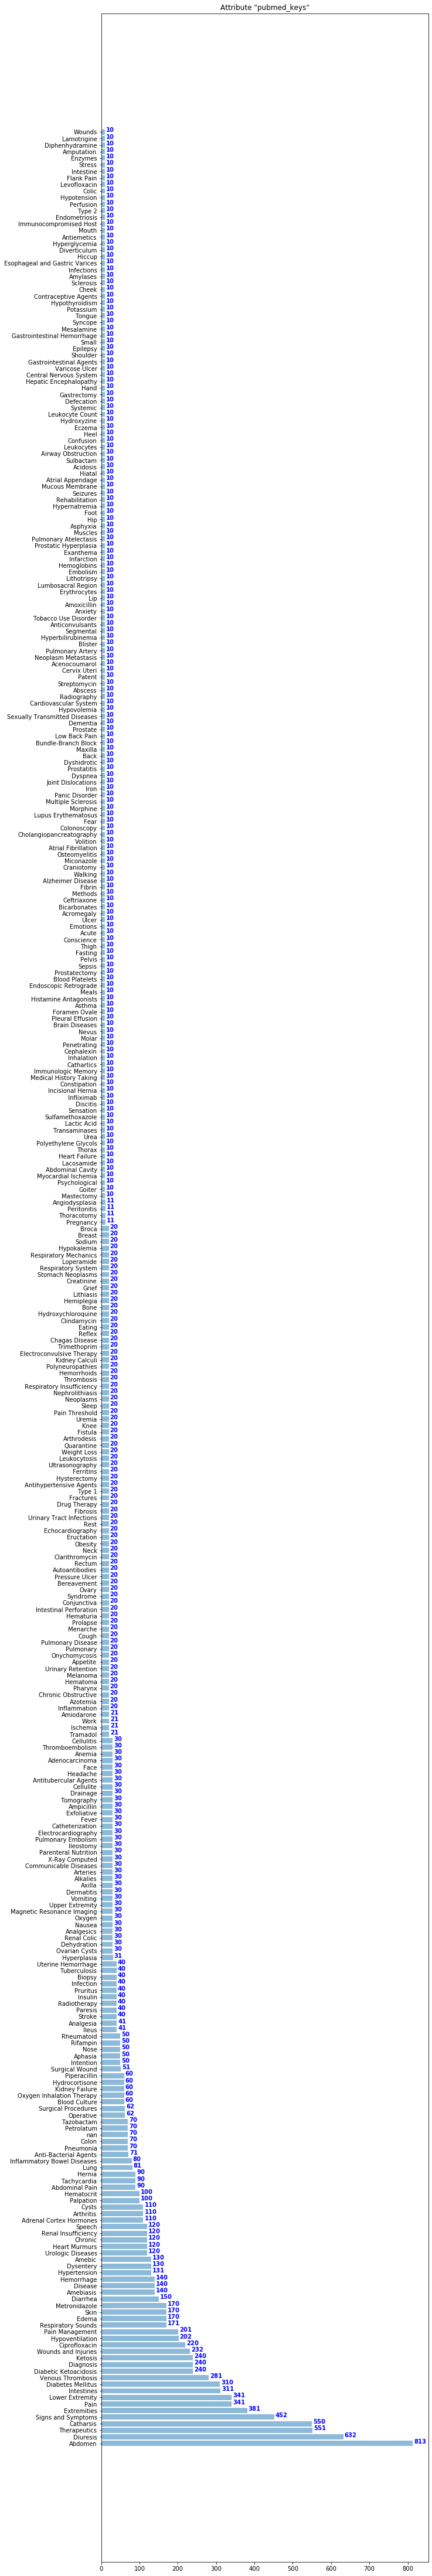

In [6]:
import matplotlib.pyplot as plt

categoriesORGPubMedKeys = dfOrg['respuesta.pubmed_keys'].value_counts()

print("total: " + str(categoriesORGPubMedKeys.size))

y_values = np.arange(len(categoriesORGPubMedKeys.index))

plt.figure(figsize=(10,80)) 
plt.barh(y_values, categoriesORGPubMedKeys.values, align='center', alpha=0.5)
plt.yticks(y_values, categoriesORGPubMedKeys.index)

for i, v in enumerate(categoriesORGPubMedKeys.values):
    plt.text(v + 3, i, str(v), color='blue', fontweight='bold', fontsize=10)

plt.title('Attribute "pubmed_keys"')

plt.show()

## Transform (factorice) from Categories to continuous atributes

Transform 'pedido.data.attributes.diagnostic_main' atribute

In [7]:
dfKNN = dfOrg

categoriesORGDiagnosticMain = dfKNN['pedido.data.attributes.diagnostic_main'].value_counts()

print("total: " + str(categoriesORGDiagnosticMain.size))

categoriesORGDiagnosticMain

total: 31


INFECCION DE PARTES BLANDAS    3270
DOLOR ABDOMINAL                2137
CETOACIDOSIS DIABETICA         1430
REHABILITACION NEUROLOGICA     1050
INSUFICIENCIA RESPIRATORIA      910
FISTULA PERITONEAL              770
REACCION ALERGICA               660
DIFICULTAD RESPIRATORIA         550
INFECCION URINARIA              470
DISNEA                          430
SINDROME FEBRIL                 390
LEGRADO                         360
CEFALEA INTENSA                 320
NEUMONIA                        320
ACV.ISQUEMICO                   310
INSUFICIENCIA CARDIACA          310
TEP                             250
PROLAPSO                        200
METRORRAGIA                     170
DIABETES                        160
ANEMIA                          150
HEMORRAGIA DIGESTIVA            140
ABDOMEN AGUDO                   121
ARTRITIS SEPTICA                120
TORACOTOMIA                     110
POLITRAUMATISMO                 110
LUXACION COLUMNA CERVICAL       100
CA GASTRICO                 

In [8]:
dataDiagnosticMain, categoriesDiagnosticMain = pd.factorize(dfKNN['pedido.data.attributes.diagnostic_main'])

dfKNN['pedido.data.attributes.diagnostic_main'] = dataDiagnosticMain

Transform 'respuesta.pubmed_keys' atribute

In [9]:
categoriesORGPubMedKeys = dfKNN['respuesta.pubmed_keys'].value_counts()

print("total: " + str(categoriesORGPubMedKeys.size))

total: 353


In [10]:
dataPubMedKeys, categoriesPubMedKeys = pd.factorize(dfKNN['respuesta.pubmed_keys'])

dfKNN['respuesta.pubmed_keys'] = dataPubMedKeys

In [11]:
dfKNN.head(10)

,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,respuesta.articlesRevisedYear,respuesta.articlesRevisedMonth,respuesta.pubmed_keys,utilidad
0,75.0,0,2018,1,0,1.0
1,75.0,0,2018,1,1,1.0
2,75.0,0,2018,1,2,1.0
3,75.0,0,2018,1,3,1.0
4,75.0,0,2018,1,4,1.0
5,75.0,0,2018,1,5,1.0
6,75.0,0,2018,1,6,1.0
7,75.0,0,2018,1,7,1.0
8,75.0,0,2018,1,8,1.0
9,75.0,0,2018,1,9,1.0


In [12]:
print("age NaN => " + str(dfKNN[pd.isnull(dfKNN['pedido.data.attributes.age'])].shape[0]))
print("diagnostic_main NaN => " + str(dfKNN[pd.isnull(dfKNN['pedido.data.attributes.diagnostic_main'])].shape[0]))
print("articlesRevisedYear NaN => " + str(dfKNN[pd.isnull(dfKNN['respuesta.articlesRevisedYear'])].shape[0]))
print("articlesRevisedMonth NaN => " + str(dfKNN[pd.isnull(dfKNN['respuesta.articlesRevisedMonth'])].shape[0]))
print("pubmed_keys NaN => " + str(dfKNN[pd.isnull(dfKNN['respuesta.pubmed_keys'])].shape[0]))
print("utilidad NaN => " + str(dfKNN[pd.isnull(dfKNN['utilidad'])].shape[0]))

age NaN => 10
diagnostic_main NaN => 0
articlesRevisedYear NaN => 0
articlesRevisedMonth NaN => 0
pubmed_keys NaN => 0
utilidad NaN => 14758


Remove row with age eq NaN

In [13]:
dfKNN = dfKNN[pd.notnull(dfKNN['pedido.data.attributes.age'])]

## Separe data by utilidad is defined

In [14]:
dfDataSetComplete = dfKNN[pd.notnull(dfKNN['utilidad'])]

print(dfDataSetComplete.shape[0])

dfDataSetToPredict = dfKNN[pd.isnull(dfKNN['utilidad'])]

print(dfDataSetToPredict.shape[0])

830
14748


In [15]:
dfDataSetComplete.head(10)

,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,respuesta.articlesRevisedYear,respuesta.articlesRevisedMonth,respuesta.pubmed_keys,utilidad
0,75.0,0,2018,1,0,1.0
1,75.0,0,2018,1,1,1.0
2,75.0,0,2018,1,2,1.0
3,75.0,0,2018,1,3,1.0
4,75.0,0,2018,1,4,1.0
5,75.0,0,2018,1,5,1.0
6,75.0,0,2018,1,6,1.0
7,75.0,0,2018,1,7,1.0
8,75.0,0,2018,1,8,1.0
9,75.0,0,2018,1,9,1.0


## k-NN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [17]:
X = dfDataSetComplete[['pedido.data.attributes.diagnostic_main',
       'respuesta.articlesRevisedYear', 
       'respuesta.articlesRevisedMonth',
       'respuesta.pubmed_keys']].values

y = dfDataSetComplete['utilidad'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
k_range = range(1, 20)
accuracy = []
error = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(knn.score(X_test, y_test))
    error.append(np.mean(y_pred != y_test))

Text(0, 0.5, 'Accuracy')

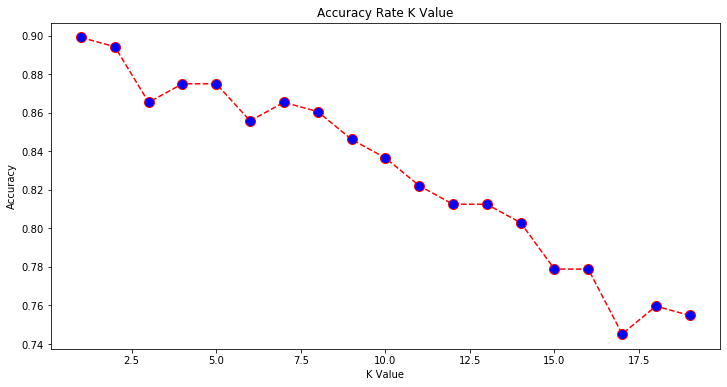

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [21]:
accuracy

[0.8990384615384616,
 0.8942307692307693,
 0.8653846153846154,
 0.875,
 0.875,
 0.8557692307692307,
 0.8653846153846154,
 0.8605769230769231,
 0.8461538461538461,
 0.8365384615384616,
 0.8221153846153846,
 0.8125,
 0.8125,
 0.8028846153846154,
 0.7788461538461539,
 0.7788461538461539,
 0.7451923076923077,
 0.7596153846153846,
 0.7548076923076923]

Text(0, 0.5, 'Mean Error')

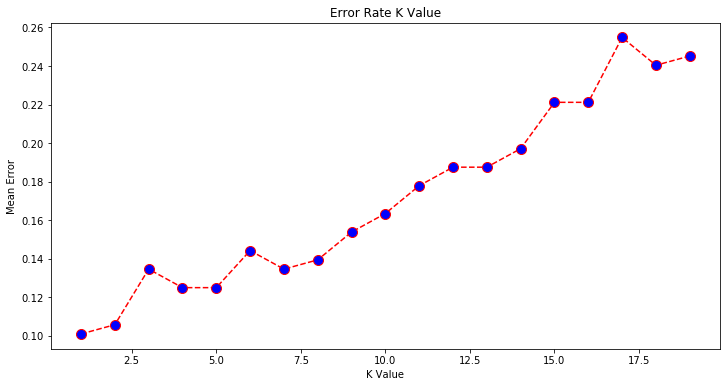

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [23]:
error

[0.10096153846153846,
 0.10576923076923077,
 0.1346153846153846,
 0.125,
 0.125,
 0.14423076923076922,
 0.1346153846153846,
 0.13942307692307693,
 0.15384615384615385,
 0.16346153846153846,
 0.1778846153846154,
 0.1875,
 0.1875,
 0.1971153846153846,
 0.22115384615384615,
 0.22115384615384615,
 0.2548076923076923,
 0.2403846153846154,
 0.24519230769230768]

In [24]:
n_neighbors = 1

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.90


## Print the K-NN classification only with the attributes "diagnostic_main" and "pubmed_keys"

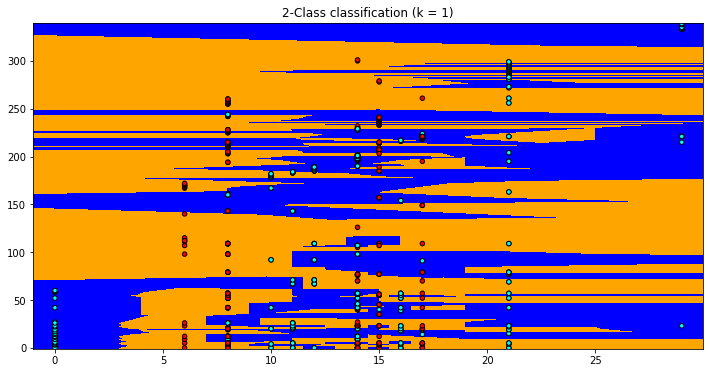

In [25]:
# see: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

X_plot = dfDataSetComplete[['pedido.data.attributes.diagnostic_main',
       'respuesta.pubmed_keys']].values
y_plot = dfDataSetComplete['utilidad'].values

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'blue'])
cmap_bold = ListedColormap(['red', 'cyan'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors)
clf.fit(X_plot, y_plot)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = 1)")

plt.show()


## Run Prediction

In [26]:
def runPrediction(row):
    valuesrow = np.array([row.get(['pedido.data.attributes.diagnostic_main',
       'respuesta.articlesRevisedYear', 
       'respuesta.articlesRevisedMonth',
       'respuesta.pubmed_keys']).values])
    return knn.predict(valuesrow)

dfDataSetToPredict.apply(runPrediction, axis=1)

28       [0.0]
29       [1.0]
30       [1.0]
31       [1.0]
32       [1.0]
         ...  
15583    [1.0]
15584    [1.0]
15585    [1.0]
15586    [1.0]
15587    [1.0]
Length: 14748, dtype: object